In [1]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
text = "This is <span style='font-size:120%;font-weight:bold'>special</span> text!"
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

In [6]:
toyplot.text.dump(layout, size=False)

toyplot.text.BlockBox
  toyplot.text.TextBox 'This is '
  toyplot.text.InlineBox
    toyplot.text.TextBox 'special'
  toyplot.text.TextBox ' text!'


<toyplot.text.TextBox {'font-size': 16.0, 'font-family': 'helvetica', 'vertical-align': 'baseline', 'line-height': 19.2} (0,0) 50.672x19.2 'This is '>
2.2
<toyplot.text.TextBox {'font-size': 19.2, 'font-weight': 'bold', 'vertical-align': 'baseline', 'font-family': 'helvetica', 'line-height': 23.04} (50.672,0) 65.1072x23.04 'special'>
2.64
<toyplot.text.TextBox {'font-size': 16.0, 'font-family': 'helvetica', 'vertical-align': 'baseline', 'line-height': 19.2} (115.7792,0) 34.688x19.2 ' text!'>
2.2


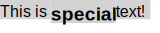

In [4]:
def draw(box, image):
    if isinstance(box, toyplot.text.TextBox):
        print box
        xml.SubElement(
            image,
            "rect",
            x=str(box.left),
            y=str(box.top),
            width=str(box.content_width),
            height=str(box.content_height),
            fill="lightgray",
        )
        
        baseline_offset = (box.style["line-height"] - box.text_height) * 0.5
        print baseline_offset
        #baseline_offset=0
        
        style = toyplot.style.combine(
            box.style,
            {"white-space":"pre"},
        )
        
        xml.SubElement(
            image,
            "text",
            x=str(box.left),
            y=str(box.bottom - baseline_offset),
            fill="black",
            stroke="none",
            style=toyplot.style.to_css(style),
        ).text = box.text
        
    for child in box.children:
        draw(child, image)

image = xml.Element(
    "svg",
    width=str(int(layout.content_width+10)),
    height=str(int(layout.content_height+10)),
    style="border: 1px solid #f0f0f0",
)
draw(layout, image)
IPython.display.SVG(xml.tostring(image))

In [5]:
reference = "<span style='font-family: helvetica; font-size: 16px'><span style='background: lightgray; vertical-align: baseline'>This is </span><span style='background: lightgray; vertical-align: baseline; font-size: 120%; font-weight:bold'>special</span><span style='background: lightgray; vertical-align: baseline'> text!</span><span>"
IPython.display.HTML(reference)